In [14]:
import scanpy as sc
import anndata as ann
import pyreadr
import scipy as sci
import pandas as pd
import os
import numpy as np
import louvain
import episcanpy.api as epi

In [12]:
sc_integrated=sc.read_10x_mtx("../data/scATAC/", cache = True)

KeyboardInterrupt: 

In [5]:
# sc_integrated=sc.("../data/scATAC/assays.h5", key = "assay001")
var=pd.read_csv("../data/scATAC/var.csv")
# var.index=var.gene_name
sc_integrated.var = var
obs=pd.read_csv("../data/scATAC/obs.csv")
# obs.index=obs.iloc[:,0]
sc_integrated.obs = obs

AnnData expects string indices for some functionality, but your first two indices are: RangeIndex(start=0, stop=2, step=1). 


In [19]:
obs

,Unnamed: 0,FRIP,TotalReads,Group,Barcode,initialClusters,UMAP1,UMAP2,Clusters,ProjectUMAP1,ProjectUMAP2,ProjectClassification
0,BMM_R1_19,0.556943,67260,BMMC_D5T1,TAGGAGGGTGCACTTA-1,Cluster1,9.028878,-3.070899,Cluster1,-7.257169,-3.767484,07_GMP
1,BMM_R1_21,0.541798,17154,BMMC_D5T1,CCTAAAGTCCGCCTAT-1,Cluster2,0.151454,13.363869,Cluster2,9.737446,-2.393460,22_CD4.M
2,BMM_R1_24,0.551778,38974,BMMC_D5T1,CCTAAAGAGAAATACC-1,Cluster3,-3.914717,-6.629660,Cluster3,1.359905,12.922869,02_Early.Eryth
3,BMM_R1_25,0.590287,38898,BMMC_D5T1,TAAACCGCACATTCTT-1,Cluster4,-2.434527,12.142631,Cluster4,11.522385,1.818643,24_CD8.CM
4,BMM_R1_26,0.626936,36546,BMMC_D5T1,TTGCCCACATTCGTCC-1,Cluster4,-1.765110,12.288043,Cluster4,10.663303,0.689267,24_CD8.CM
...,...,...,...,...,...,...,...,...,...,...,...,...
70456,RM9_2132,0.367928,11100,MPAL5_R1,ACTAACGAGGTACATA-1,Cluster4,-3.900144,11.570778,Cluster4,10.266765,2.273359,Healthy_Like
70457,RM9_2134,0.335893,20054,MPAL5_R1,TAACAGCCATCATAGC-1,Cluster8,-3.257237,-4.751131,Cluster8,2.687061,12.325001,Healthy_Like
70458,RM9_2101,0.275620,16530,MPAL5_R1,AAACTCGGTCTGTTGA-1,Cluster40,0.890739,4.249907,Cluster40,-6.083007,5.185828,Lymphoid_Like
70459,RM9_2133,0.301526,15856,MPAL5_R1,AGTTACGTCGCTCTAC-1,Cluster40,1.493757,6.000092,Cluster40,-5.803992,5.415746,Lymphoid_Like


Transforming to str index.


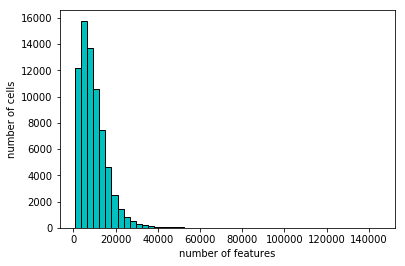

In [17]:
# epi.pp.commoness_features(sc_integrated)
# epi.pp.coverage_cells(sc_integrated)
sc_bin = epi.pp.binarize(sc_integrated, copy=True)
epi.pp.coverage_cells(sc_bin)

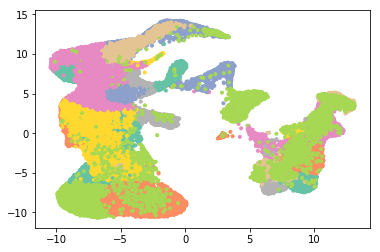

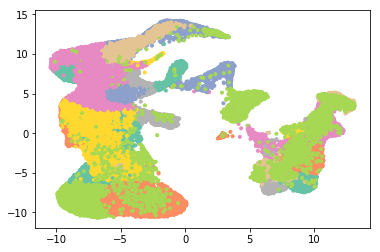

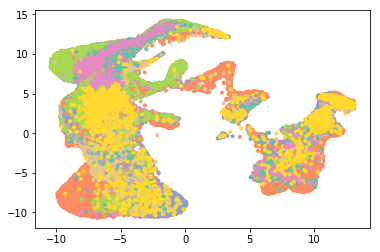

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

col_data=obs

color_labels = col_data.ProjectClassification.unique()
rgb_values = sns.color_palette("Set2", 60)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(col_data.ProjectUMAP1, col_data.ProjectUMAP2,
            marker='.', c=col_data.ProjectClassification.map(color_map))
plt.show()

# col_data= col_data[col_data.ProjectClassification != 'Reference']

plt.scatter(col_data.ProjectUMAP1, col_data.ProjectUMAP2,
            marker='.', c=col_data.ProjectClassification.map(color_map))
plt.show()


color_labels =col_data.Group.unique()
rgb_values = sns.color_palette("Set2", 60)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(col_data.ProjectUMAP1, col_data.ProjectUMAP2,
            marker='.', c=col_data.Group.map(color_map))
plt.show()

In [ ]:
# EDA
## pca
sc.tl.pca(sc_bin, svd_solver='arpack')
# sc.pl.pca(sc_integrated, color='CST3')
# sc.pl.pca_variance_ratio(sc_integrated, log=True)
## umap
sc.pp.neighbors(sc_bin, n_neighbors=10, n_pcs=40)
sc.tl.umap(sc_bin)
sc.pl.umap(sc_bin, color=['ProjectClassification', 'Group'])
sc.pl.umap(sc_bin, color=['ProjectClassification', 'Group'])

In [ ]:
surface_markers=['CD3D', 'CD14', 'CD19', 'CD8A']
TFs = ['CEBPB', 'GATA1', 'TBX21', 'PAX5']
sc.pl.umap(sc_bin, color=surface_markers)
sc.pl.umap(sc_bin, color=TFs)